## Library

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded
Loaded


In [2]:
def plot_anchor(anchor, bins=200, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(get_percentiles(anchor))
    return None


def sample_tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                              flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                              bayes_update=None, debug=False):
    if bayes_update is None:
        bayes_update = lambda x: x
    
    brain_ = sample(brain)
    eff_ = sample(efficiency)
    tvh_ = sample(transformative_vs_human)
    h_ = sample(horizon_length)
    e_ = sample(scaling_exponent)
    fpp_ = sample(flops_per_param_per_sec)
    
    if params is None:
        params_ = brain_ + eff_ - fpp_        
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * ({brain_} + {eff_} - {fpp_})")
    else:
        params_ = sample(params)
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * {params_}")
        
    return bayes_update(brain_ + eff_ + tvh_ + h_ + ref_params_samples - e_ * ref_params + e_ * params_)


def cotra_bayes_update_against_low_flop(f):
    f = f + sample(norm(1,3)) if f < 27 and random.random() > 0.3 else f
    f = f + sample(norm(1,3)) if f < 26 and random.random() > 0.2 else f
    f = f + sample(norm(1,3)) if f < 25 and random.random() > 0.1 else f
    f = f + sample(norm(1,3)) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def sample_cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop):
    return sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                     efficiency=const(1),
                                     transformative_vs_human=norm(-2,2),
                                     horizon_length=horizon_length,
                                     scaling_exponent=norm(0.5,1.1),
                                     flops_per_param_per_sec=norm(1,2),
                                     bayes_update=bayes_update)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.428389324861453,
 5: 26.58479314589966,
 10: 27.287525397720028,
 20: 28.22505067701523,
 30: 29.142350128843376,
 40: 30.295678674808485,
 50: 31.4924504636122,
 60: 32.71580704434956,
 70: 34.12316674089047,
 80: 35.882180584596895,
 90: 38.45306249051861,
 95: 40.94475729873166,
 99: 45.571005518279804}


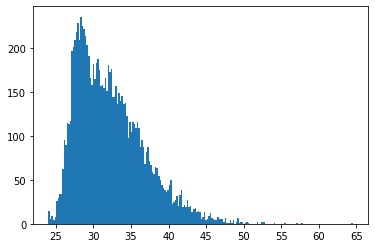

In [3]:
short_horizon_nn_anchor = [sample_cotra_anchor(horizon_length=norm(0,3)) for s in range(10000)]
plot_anchor(short_horizon_nn_anchor)

Before update
{1: 21.917011895911063,
 5: 24.425826377338133,
 10: 25.905479591785305,
 20: 27.720240194000496,
 30: 29.014342977357764,
 40: 30.268496783681034,
 50: 31.50330050546613,
 60: 32.82796885857574,
 70: 34.22360315414232,
 80: 35.909124140853216,
 90: 38.51813681112675,
 95: 40.793607080181765,
 99: 45.545368970396744}
After update
{1: 25.428389324861453,
 5: 26.58479314589966,
 10: 27.287525397720028,
 20: 28.22505067701523,
 30: 29.142350128843376,
 40: 30.295678674808485,
 50: 31.4924504636122,
 60: 32.71580704434956,
 70: 34.12316674089047,
 80: 35.882180584596895,
 90: 38.45306249051861,
 95: 40.94475729873166,
 99: 45.571005518279804}


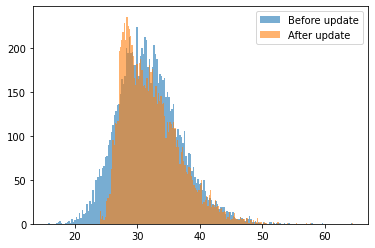

In [4]:
short_no_update = [sample_cotra_anchor(horizon_length=norm(0,3), bayes_update=None) for s in range(10000)]
plot_anchor(short_no_update, alpha=0.6, label='Before update')
plot_anchor(short_horizon_nn_anchor, alpha=0.6, label='After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.60109091666302,
 5: 27.957644947536895,
 10: 28.978333553564454,
 20: 30.678785788992002,
 30: 32.11090984730177,
 40: 33.3986693334922,
 50: 34.62047920553499,
 60: 35.84503231490402,
 70: 37.20204744005338,
 80: 38.8968471855239,
 90: 41.28663991962549,
 95: 43.51401109943664,
 99: 48.347761115489455}


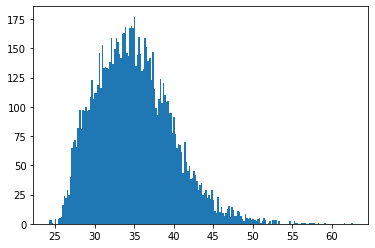

In [5]:
medium_horizon_nn_anchor = [sample_cotra_anchor(horizon_length=norm(3,6)) for s in range(10000)]
plot_anchor(medium_horizon_nn_anchor)

## Cotra's Long NN Anchor

{1: 28.359339655541234,
 5: 30.636118600116838,
 10: 31.98946296204156,
 20: 33.76671598898076,
 30: 35.09619025966983,
 40: 36.33893058853138,
 50: 37.52595998285214,
 60: 38.78739109758049,
 70: 40.22431632416996,
 80: 41.97702132747878,
 90: 44.47477479539315,
 95: 46.76135729355251,
 99: 51.76701628765175}


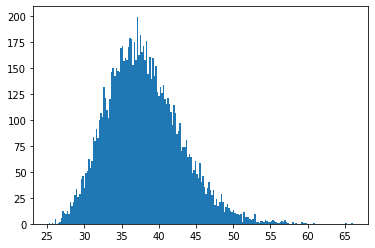

In [6]:
long_horizon_nn_anchor = [sample_cotra_anchor(horizon_length=norm(6,9)) for s in range(10000)]
plot_anchor(long_horizon_nn_anchor)

## Cotra's GPT Anchor

{1: 24.98595837092999,
 5: 26.04356149071968,
 10: 26.650364359155095,
 20: 27.453615134148176,
 30: 28.121653082028523,
 40: 28.90651490683773,
 50: 29.945939703068504,
 60: 31.17531176651992,
 70: 32.52969354400119,
 80: 34.287348557279074,
 90: 36.83214326216188,
 95: 39.127525246427126,
 99: 43.77258486449325}


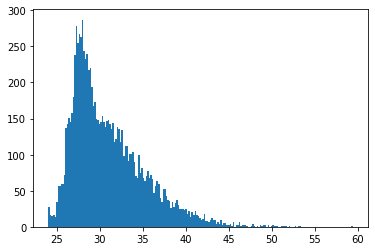

In [7]:
gpt_anchor = [sample_cotra_anchor(horizon_length=const(0)) for s in range(10000)]
plot_anchor(gpt_anchor)

## Cotra's Lifetime Anchor

{1: 25.179830799216223,
 5: 26.137993658886284,
 10: 26.63212834416407,
 20: 27.29823969023141,
 30: 27.799949542707203,
 40: 28.343628914535117,
 50: 28.9562301000931,
 60: 29.720892301691595,
 70: 30.66501912060328,
 80: 31.79226948326337,
 90: 33.40702792649932,
 95: 34.90042765165077,
 99: 37.8159565720611}


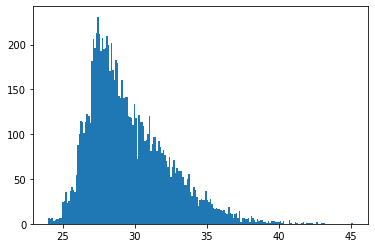

In [8]:
lifetime_anchor = [sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                             efficiency=distributed_lognorm([[2,5],[5,9]],[0.5,0.5]),
                                             transformative_vs_human=norm(-2,2),
                                             horizon_length=const(9),
                                             scaling_exponent=const(0),
                                             flops_per_param_per_sec=const(0),
                                             ref_params_samples=0,
                                             bayes_update=cotra_bayes_update_against_low_flop) for s in range(10000)]
plot_anchor(lifetime_anchor)

## Cotra's Evolution Anchor

{1: 32.1668302851617,
 5: 34.681885743917796,
 10: 36.063106084478456,
 20: 37.6446505248679,
 30: 38.813494112402644,
 40: 39.87008359247291,
 50: 40.828854495213335,
 60: 41.69350206314177,
 70: 42.71553962059139,
 80: 43.9297036402912,
 90: 45.585619351376025,
 95: 46.91672003145101,
 99: 49.353219539784284}


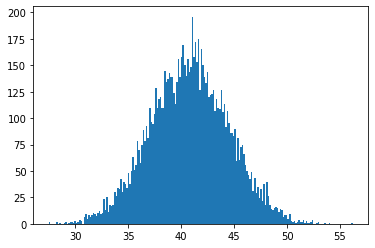

In [9]:
average_ancestor_brain_flops = lognorm(3,6)
log_n_individuals = norm(20,22)
evo_time_log_sec = const(16)
evolution_anchor = [sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                              efficiency=norm(-6,5),
                                              transformative_vs_human=norm(-2,2),
                                              horizon_length=lambda: sample(log_n_individuals) + sample(evo_time_log_sec),
                                              scaling_exponent=const(0),
                                              flops_per_param_per_sec=const(0),
                                              ref_params_samples=0,
                                              bayes_update=None) for s in range(10000)]
plot_anchor(evolution_anchor)


## Cotra's Genome Anchor

{1: 27.8660072378216,
 5: 29.37090717417449,
 10: 30.261031693511704,
 20: 31.465128100749666,
 30: 32.33885886935642,
 40: 33.09057741026879,
 50: 33.85761910041735,
 60: 34.61972561597362,
 70: 35.44943408449825,
 80: 36.50498749007815,
 90: 37.9527968660976,
 95: 39.24697809732186,
 99: 41.79781537208676}


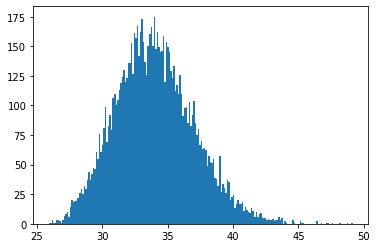

In [10]:
genome_anchor = [sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                           params=norm(8.3,9.44), # Centered on 8.87... there are ~10^8.7 'params' in genome
                                           efficiency=norm(0,2),
                                           transformative_vs_human=norm(-2,2),
                                           horizon_length=norm(7,9),
                                           scaling_exponent=norm(0.5,1.1),
                                           flops_per_param_per_sec=norm(1,2),
                                           bayes_update=cotra_bayes_update_against_low_flop) for s in range(10000)]
plot_anchor(genome_anchor)

## All Cotra Anchors

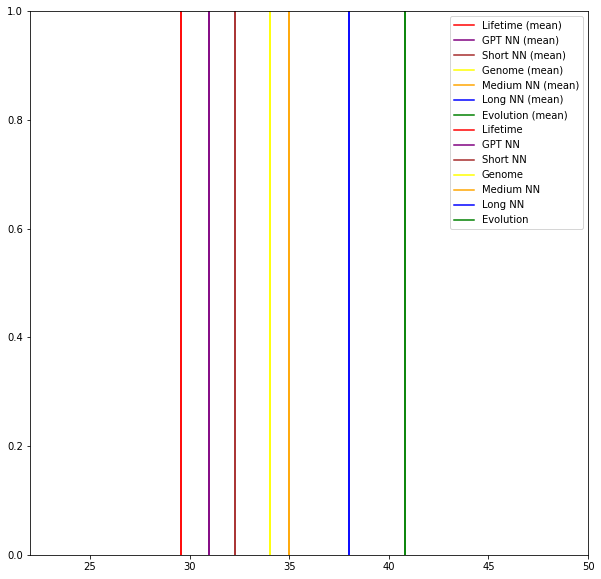

In [11]:
plt.figure(figsize=(10,10))
alpha = 0.6; bins = 100
plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN (mean)', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN (mean)', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome (mean)', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution (mean)', color='green')

plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution', color='green')

plt.xlim([22, 50])
plt.legend()
plt.show()

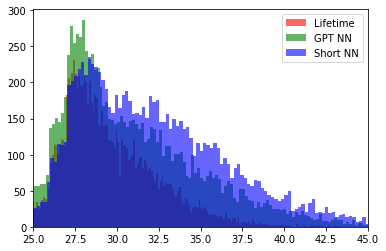

In [12]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.hist(short_horizon_nn_anchor, bins=200, alpha=alpha, label='Short NN', color='blue', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

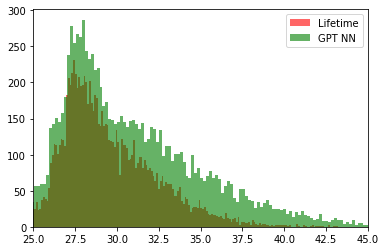

In [13]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Before update
{1: 18.73653139116293,
 5: 20.06451937289576,
 10: 20.737760247860862,
 20: 21.71138700581829,
 30: 22.428293513757872,
 40: 23.045894695126304,
 50: 23.70607881662351,
 60: 24.358508716677143,
 70: 25.086925317745866,
 80: 26.02225483059491,
 90: 27.36798002611473,
 95: 28.50358875466727,
 99: 30.95590501242183}
After update
{1: 24.0,
 5: 24.563532578149395,
 10: 25.069553846948867,
 20: 25.5155620195101,
 30: 25.948360796441687,
 40: 26.268717544784458,
 50: 26.573253267679547,
 60: 26.92129593678314,
 70: 27.287138148093675,
 80: 27.729668284361512,
 90: 28.414966921744945,
 95: 29.071744016094975,
 99: 31.181951827016253}
Cotra's lifetime anchor
{1: 25.179830799216223,
 5: 26.137993658886284,
 10: 26.63212834416407,
 20: 27.29823969023141,
 30: 27.799949542707203,
 40: 28.343628914535117,
 50: 28.9562301000931,
 60: 29.720892301691595,
 70: 30.66501912060328,
 80: 31.79226948326337,
 90: 33.40702792649932,
 95: 34.90042765165077,
 99: 37.8159565720611}


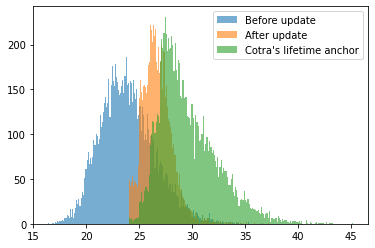

In [14]:
simple_lifetime_anchor = [sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                                    efficiency=const(0),
                                                    transformative_vs_human=const(0),
                                                    horizon_length=const(9),
                                                    scaling_exponent=const(0),
                                                    flops_per_param_per_sec=const(0),
                                                    ref_params_samples=0,
                                                    bayes_update=cotra_bayes_update_against_low_flop) for s in range(10000)]

simple_lifetime_anchor_noup = [sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                                         efficiency=const(0),
                                                         transformative_vs_human=const(0),
                                                         horizon_length=const(9),
                                                         scaling_exponent=const(0),
                                                         flops_per_param_per_sec=const(0),
                                                         ref_params_samples=0,
                                                         bayes_update=None) for s in range(10000)]

plot_anchor(simple_lifetime_anchor_noup, alpha=0.6, label='Before update')
plot_anchor(simple_lifetime_anchor, alpha=0.6, label='After update')
plot_anchor(lifetime_anchor, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.legend()


## Updated Evolution Anchor

{1: 32.161466183414966,
 5: 34.892322098271684,
 10: 36.36636431203299,
 20: 38.027407035375695,
 30: 39.254284037660184,
 40: 40.335054690265274,
 50: 41.32553950902144,
 60: 42.291976583688104,
 70: 43.38058408572379,
 80: 44.65145079882798,
 90: 46.544429719718174,
 95: 48.14250728260982,
 99: 51.15779193461181}


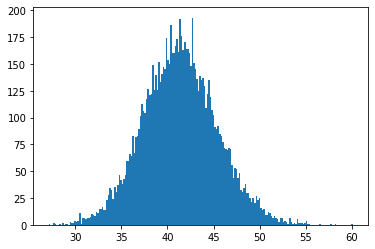

In [20]:
average_ancestor_brain_flops = lognorm(3,6)
log_n_individuals = norm(20,22)
evo_time_log_sec = const(16)

def sample_evolution_anchor():
    evo_anchor = sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                           efficiency=norm(-6,5),
                                           transformative_vs_human=norm(-2,2),
                                           horizon_length=lambda: sample(log_n_individuals) + sample(evo_time_log_sec),
                                           scaling_exponent=const(0),
                                           flops_per_param_per_sec=const(0),
                                           ref_params_samples=0,
                                           bayes_update=None)
    
    anthropic_adjustment = norm(-1.3,1.3)
    
    r_ = random.random()
    environment_adjustment = sample(lognorm(1,5)) if r_ <= 0.2 else 0
    
    return evo_anchor + sample(anthropic_adjustment) + environment_adjustment

updated_evolution_anchor = [sample_evolution_anchor() for s in range(10000)]
plot_anchor(updated_evolution_anchor)


Cotra's evolution anchor
{1: 32.1668302851617,
 5: 34.681885743917796,
 10: 36.063106084478456,
 20: 37.6446505248679,
 30: 38.813494112402644,
 40: 39.87008359247291,
 50: 40.828854495213335,
 60: 41.69350206314177,
 70: 42.71553962059139,
 80: 43.9297036402912,
 90: 45.585619351376025,
 95: 46.91672003145101,
 99: 49.353219539784284}
Updated evolution anchor
{1: 32.161466183414966,
 5: 34.892322098271684,
 10: 36.36636431203299,
 20: 38.027407035375695,
 30: 39.254284037660184,
 40: 40.335054690265274,
 50: 41.32553950902144,
 60: 42.291976583688104,
 70: 43.38058408572379,
 80: 44.65145079882798,
 90: 46.544429719718174,
 95: 48.14250728260982,
 99: 51.15779193461181}


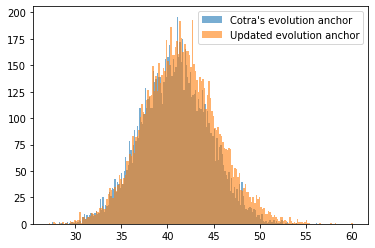

In [22]:
plot_anchor(evolution_anchor, alpha=0.6, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor, alpha=0.6, label='Updated evolution anchor')
plt.legend()

## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.0635061863062125,
 60: 1.882352986545647,
 70: 3.007015738574779,
 80: 4.555193795010026,
 90: 7.007868910884066,
 95: 8.889028473422533,
 99: 10.41841798119013}


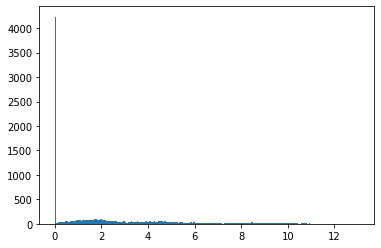

In [26]:
def horizon_length():
    r_ = random.random()
    if r_ < 0.4:
        h = 0
    elif r_ < 0.7:
        h = sample(norm(0,3))
    elif r_ < 0.9:
        h = sample(lognorm(3,7))
    else:
        h = sample(norm(7,11))
        
    if h < 0:
        h = 0
    
    return h

plot_anchor([horizon_length() for s in range(10000)])

{1: 22.114593171607076,
 5: 24.856720474078656,
 10: 25.742750266667493,
 20: 27.13318385176137,
 30: 28.712165260676517,
 40: 30.278871527202302,
 50: 31.78983827104912,
 60: 33.46385944092047,
 70: 35.32515837328864,
 80: 37.51081790304194,
 90: 40.90412138298156,
 95: 43.733076734495604,
 99: 49.74586801776058}


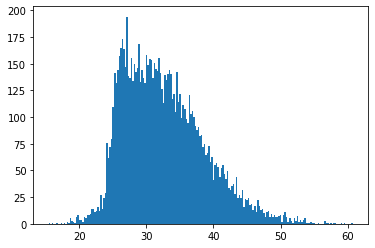

In [27]:
def peter_bayes_update_against_low_flop(f):
    f = f + sample(norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sample(norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sample(norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sample(norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = [sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                         efficiency=norm(-1,2),               # Allows for AI being more efficient
                                         transformative_vs_human=norm(-2,2),
                                         horizon_length=horizon_length,
                                         scaling_exponent=norm(0.5,1.5),   # Update: scaling exponent now centered on 1
                                         flops_per_param_per_sec=norm(1,2),
                                         bayes_update=peter_bayes_update_against_low_flop) for s in range(10000)]
plot_anchor(meta_anchor)


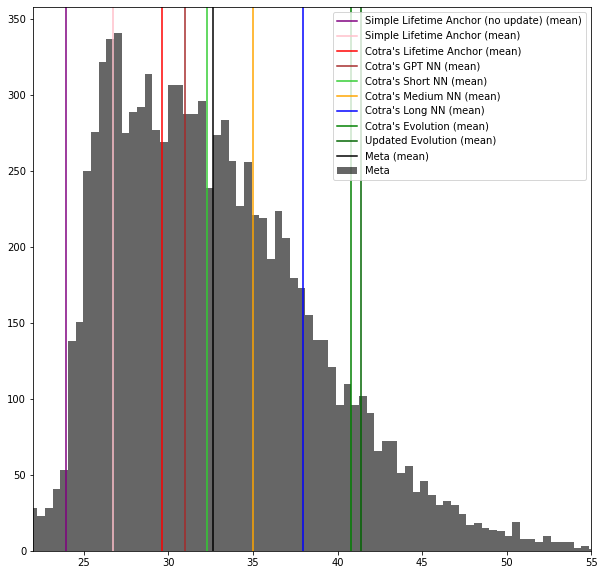

In [30]:
alpha = 0.6; bins = 100
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor), label='Meta (mean)', color='black')
plt.hist(meta_anchor, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([22, 55])
plt.legend()
plt.show()

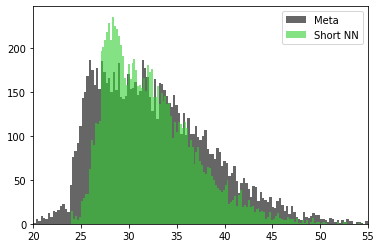

In [18]:
alpha = 0.6
plt.hist(meta_anchor, bins=200, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(short_horizon_nn_anchor, bins=200, alpha=alpha, label='Short NN', color='limegreen', lw=0)
plt.xlim([20, 55])
plt.legend()
plt.show()

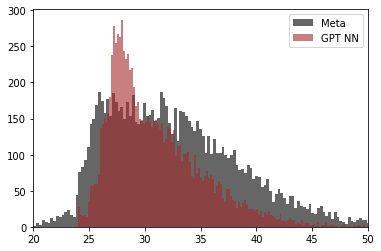

In [19]:
alpha = 0.6
plt.hist(meta_anchor, bins=200, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='brown', lw=0)
plt.xlim([20, 50])
plt.legend()
plt.show()